# Examples of using Prompts as Composable Primitives

In this notebook we'll go through examples of leveraging prompts as primitives for learning environments.

In [3]:
%load_ext autoreload
%autoreload 2

## Example 1 - Knowledge Graph Primitive

This example, taken from Jason Liu's talk: "Pydantic is all you need" shows how creating a knowledge graph can be as simple as a prompt coupled with some simple classes to handle construction of the graph plus some validation checks. 

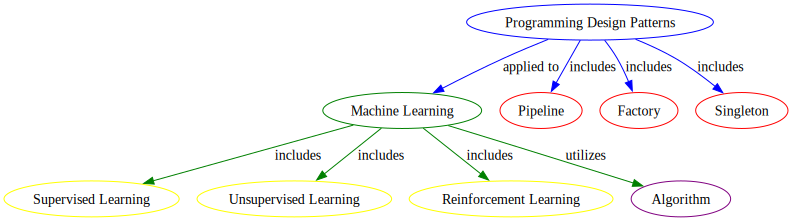

Knowledge graph generated and visualized.


In [3]:
from visualize_knowledge_graph import knowledge_graph_primitive

knowledge_graph_primitive("Programming Design Patterns for Machine Learning")

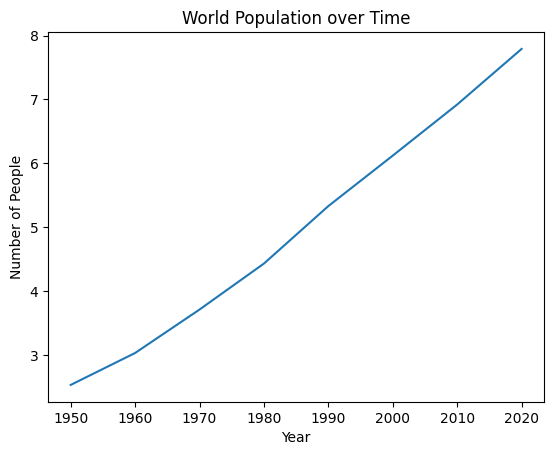

In [27]:
from pydantic import BaseModel, Field
from typing import List, Optional
from openai import OpenAI
import instructor
from IPython.display import display
from pydantic import BaseModel, Field
from typing import List
import matplotlib.pyplot as plt

client = instructor.patch(OpenAI())


class DataPlot(BaseModel):
    x_values: List[float]
    y_values: List[float]
    # hist_data: List[float]
    title: str
    x_label: str
    y_label: str
    plot_type: str = Field(default="line", description="Type of the plot (line, bar, scatter, hist)")
    # density: bool = Field(default=False, description="Density of histogram plot")
    # alpha: float = Field(default=0.7, description="Alpha of histogram plot")
    color: Optional[str] = Field(default=None, description="Color of the plot")
    marker: Optional[str] = Field(default=None, description="Marker style for scatter plot")

def generate_plot(input) -> DataPlot:
    return client.chat.completions.create(
        model="gpt-3.5-turbo-16k",
        messages=[
            {
                "role": "user",
                "content": f"Help me visualize this concept in a plot:{input}",
            }
        ],
        response_model=DataPlot,
    )  # type: ignore


def plot(dp: DataPlot):
    if dp.plot_type == "line":
        plt.plot(dp.x_values, dp.y_values, color=dp.color, marker=dp.marker)
    elif dp.plot_type == "bar":
        plt.bar(dp.x_values, dp.y_values, color=dp.color)
    elif dp.plot_type == "scatter":
        plt.scatter(dp.x_values, dp.y_values, color=dp.color, marker=dp.marker)
    else:
        raise ValueError("Unsupported plot type")

    plt.title(dp.title)
    plt.xlabel(dp.x_label)
    plt.ylabel(dp.y_label)
    plt.show()

def plot_primitive(prompt):
    dp = generate_plot(prompt)
    plot(dp)

# Example usage
plot_primitive("Plot a line graph of the number of people in the world over time.")


We want more power of expression and we want flexiblity.

In [30]:
# !pip install ipywidgets

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def plot_spiral(angle):
    t = np.linspace(0, angle, 1000)
    x = t * np.cos(t)
    y = t * np.sin(t)
    
    plt.plot(x, y)
    plt.axis('equal')
    plt.title('Spiral')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# What else could I do with this example?
interact(plot_spiral, angle=(0, 10*np.pi, 0.1*np.pi))

interactive(children=(FloatSlider(value=15.707963267948966, description='angle', max=31.41592653589793, step=0…

<function __main__.plot_spiral(angle)>

In [44]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to update the plot
def update_plot(x, y):
    plt.gca().clear()
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(color='darkgreen', linestyle='--')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().add_patch(plt.Rectangle((x, y), 0.5, 0.5, color='black'))
    plt.show()

# Where can I go with this example?
# Create the plot initially
# Create sliders
x_slider = widgets.FloatSlider(value=5, min=0, max=9.9, step=0.1, description='X Position:')
y_slider = widgets.FloatSlider(value=5, min=0, max=9.9, step=0.1, description='Y Position:')
square_button = widgets.Button(description='Square')
# Display widgets
widgets.interactive(update_plot, x=x_slider, y=y_slider)

interactive(children=(FloatSlider(value=5.0, description='X Position:', max=9.9), FloatSlider(value=5.0, descr…

![](2023-12-05-14-09-39.png)

From the paper: https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

Prompt:

Explain to me in some interactive visual way this mathematical expression: from the "ImageNet Classification with Deep Convolutional Neural Networks" paper.

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the normalization function based on the equation
def local_response_normalization(a, k, n, alpha, beta):
    N = a.shape[0]
    b = np.zeros_like(a)
    for i in range(N):
        for x in range(a.shape[1]):
            for y in range(a.shape[2]):
                # Convert n to integer for indexing
                sum_sqr = np.sum(a[max(0, i - int(n) // 2):min(N, i + 1 + int(n) // 2), x, y]**2)
                b[i, x, y] = a[i, x, y] / ((k + alpha * sum_sqr) ** beta)
    return b


# Interactive function to plot the activations
def interactive_normalization(k=2, n=5, alpha=1e-4, beta=0.75):
    normalized_a = local_response_normalization(a, k, n, alpha, beta)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    ax1, ax2 = axes
    ax1.imshow(a[0], cmap='viridis')
    ax1.set_title('Original Activations')
    ax2.imshow(normalized_a[0], cmap='viridis')
    ax2.set_title('Normalized Activations')
    plt.show()



# Dummy data: create a feature map with random activations
a = np.random.rand(5, 5, 5) # Example with 5 feature maps of size 5x5
# Define sliders for interactive components
k_slider = FloatSlider(min=0, max=5, step=0.1, value=2, description='k')
n_slider = FloatSlider(min=1, max=10, step=1, value=5, description='n (size of local area)')
alpha_slider = FloatSlider(min=0, max=1e-3, step=1e-5, value=1e-4, description='alpha')
beta_slider = FloatSlider(min=0, max=1, step=0.05, value=0.75, description='beta')

# Create the interactive visualization
interact(interactive_normalization, k=k_slider, n=n_slider, alpha=alpha_slider, beta=beta_slider)


interactive(children=(FloatSlider(value=2.0, description='k', max=5.0), FloatSlider(value=5.0, description='n …

<function __main__.interactive_normalization(k=2, n=5, alpha=0.0001, beta=0.75)>

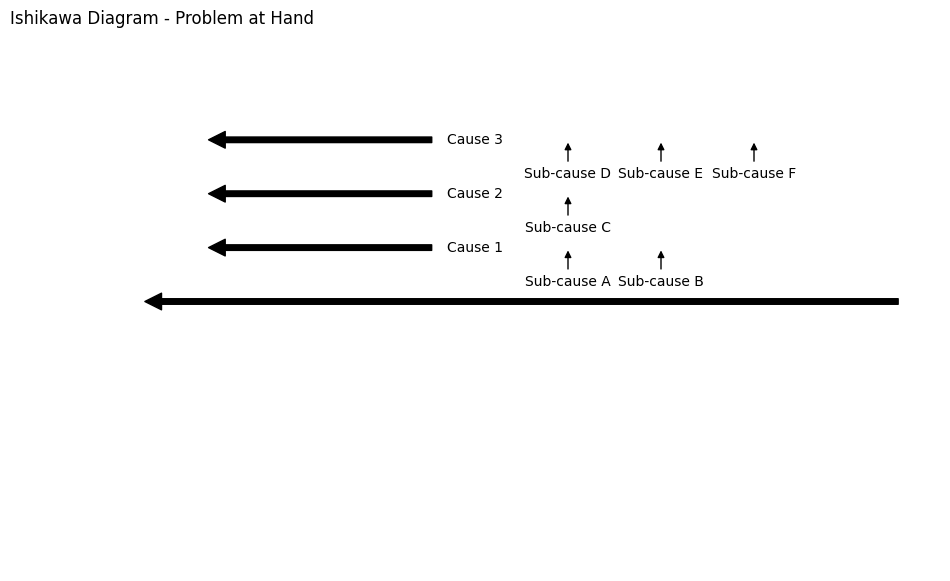

In [1]:
import matplotlib.pyplot as plt

def draw_ishikawa(main_cause, sub_causes):
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.set_title('Ishikawa Diagram - ' + main_cause, loc='left')

    # Draw the main spine of the fishbone
    ax.annotate('', xy=(0.1, 0.5), xytext=(1, 0.5), 
                arrowprops=dict(facecolor='black', shrink=0.05))

    # Draw the causes as arrows
    for i, (cause, effects) in enumerate(sub_causes.items(), start=1):
        y_pos = 0.5 + (0.1 * i)
        ax.annotate(cause, xy=(0.2, y_pos), xytext=(0.5, y_pos), 
                    arrowprops=dict(facecolor='black', shrink=0.05), 
                    ha='center', va='center')

        # Draw the sub-causes for each cause
        for j, effect in enumerate(effects, start=1):
            x_pos = 0.5 + (0.1 * j)
            ax.annotate(effect, xy=(x_pos, y_pos), xytext=(x_pos, y_pos-0.05), 
                        arrowprops=dict(facecolor='black', arrowstyle='-|>'), 
                        ha='center', va='top')

    # Remove all axes and ticks
    ax.axis('off')
    plt.show()

# Example usage:
main_cause = 'Problem at Hand'
sub_causes = {
    'Cause 1': ['Sub-cause A', 'Sub-cause B'],
    'Cause 2': ['Sub-cause C'],
    'Cause 3': ['Sub-cause D', 'Sub-cause E', 'Sub-cause F'],
}

draw_ishikawa(main_cause, sub_causes)